In [33]:
import torchvision
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

In [41]:
ds = torchvision.datasets.ImageFolder('Data/Data/', transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()]))

In [42]:
dataloader = torch.utils.data.DataLoader(ds)

In [203]:
ds_aug = torchvision.datasets.ImageFolder('Data/Data/', transforms.Compose([transforms.Resize((256,256)),transforms.RandomCrop(220, padding=4),transforms.RandomHorizontalFlip(),transforms.ToTensor()]))
dataloader_aug = torch.utils.data.DataLoader(ds_aug, batch_size=8)

In [82]:
dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 70
    Root location: Data/Data/
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

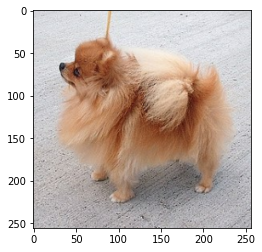

In [113]:
plt.imshow(ds[0][0].permute(1, 2, 0))

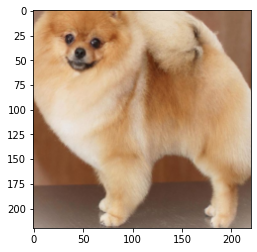

In [213]:
for i, data in enumerate(dataloader_aug):
    plt.imshow(data[0][0].permute(1, 2, 0))

In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [58]:
model = torchvision.models.resnet18()
#model = model.to(device)

In [188]:
from torch.functional import F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(47, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()

In [189]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [162]:
losses = []
for k in range(10):
    for i, data in enumerate(dataloader_aug, 0):
        feature, label = data
        optimizer.zero_grad()
        outputs = model(feature)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
        losses.append(loss)
    print("Epoch", loss)

RuntimeError: only batches of spatial targets supported (3D tensors) but got targets of dimension: 1

In [158]:
data

[tensor([[[[0.8863, 0.8980, 0.8706,  ..., 0.8549, 0.8824, 0.8745],
           [0.8588, 0.8353, 0.8196,  ..., 0.8353, 0.8745, 0.8275],
           [0.8706, 0.8510, 0.8431,  ..., 0.8510, 0.8627, 0.8275],
           ...,
           [0.7059, 0.6078, 0.5333,  ..., 0.7216, 0.7020, 0.7137],
           [0.5451, 0.6980, 0.7176,  ..., 0.7451, 0.7725, 0.8000],
           [0.5765, 0.6902, 0.7255,  ..., 0.7412, 0.7333, 0.7490]],
 
          [[0.8902, 0.9020, 0.8745,  ..., 0.8588, 0.8863, 0.8784],
           [0.8627, 0.8392, 0.8235,  ..., 0.8392, 0.8784, 0.8314],
           [0.8745, 0.8549, 0.8471,  ..., 0.8549, 0.8667, 0.8314],
           ...,
           [0.6941, 0.5961, 0.5216,  ..., 0.7059, 0.6863, 0.6980],
           [0.5333, 0.6863, 0.7059,  ..., 0.7294, 0.7569, 0.7843],
           [0.5647, 0.6784, 0.7176,  ..., 0.7255, 0.7176, 0.7333]],
 
          [[0.9098, 0.9216, 0.8941,  ..., 0.8745, 0.9020, 0.8980],
           [0.8824, 0.8588, 0.8431,  ..., 0.8510, 0.8902, 0.8431],
           [0.8941, 0.87

In [64]:
running_loss = 0.0
for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print('[%5d] loss: %.3f' %
              (i + 1, running_loss / 2000))
        running_loss = 0.0

print('Finished Training')

[    1] loss: 0.017
[    2] loss: 0.018
[    3] loss: 0.016
[    4] loss: 0.015
[    5] loss: 0.013
[    6] loss: 0.012
[    7] loss: 0.010
[    8] loss: 0.008
[    9] loss: 0.006
[   10] loss: 0.004
[   11] loss: 0.001
[   12] loss: 0.000
[   13] loss: 0.000
[   14] loss: 0.000
[   15] loss: 0.000
[   16] loss: 0.000
[   17] loss: 0.000
[   18] loss: 0.000
[   19] loss: 0.000
[   20] loss: 0.000
[   21] loss: 0.000
[   22] loss: 0.000
[   23] loss: 0.015
[   24] loss: 0.016
[   25] loss: 0.015
[   26] loss: 0.015
[   27] loss: 0.014
[   28] loss: 0.014
[   29] loss: 0.013
[   30] loss: 0.011
[   31] loss: 0.010
[   32] loss: 0.008
[   33] loss: 0.007
[   34] loss: 0.005
[   35] loss: 0.003
[   36] loss: 0.002
[   37] loss: 0.000
[   38] loss: 0.000
[   39] loss: 0.000
[   40] loss: 0.000
[   41] loss: 0.000
[   42] loss: 0.000
[   43] loss: 0.000
[   44] loss: 0.000
[   45] loss: 0.000
[   46] loss: 0.000
[   47] loss: 0.000
[   48] loss: 0.000
[   49] loss: 0.000
[   50] loss: 0.000


In [138]:
plt.plot(losses.detach().numpy())

AttributeError: 'list' object has no attribute 'detach'

In [146]:
total = 0
correct = 0
with torch.no_grad():
    for data in dataloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 68 %


In [147]:
outputs

tensor([[ 7.6652e+00,  1.2331e+01,  2.4187e-02,  2.3436e-02, -3.0040e-01,
         -8.1052e-02,  8.5830e-02,  1.3579e-02,  1.5865e-01, -9.8283e-02,
          1.0704e-01,  1.8193e-01,  8.4928e-02, -2.0568e-01,  9.4517e-02,
         -9.8800e-02,  4.7458e-03,  2.8807e-02, -5.9276e-03,  1.5061e-01,
          1.0656e-01, -1.3578e-01,  2.3667e-02,  1.7249e-01,  4.1604e-02,
          2.0054e-02,  1.0907e-01,  6.0392e-02, -1.0200e-01,  7.0022e-02,
         -6.6679e-02, -1.1659e-01,  4.2099e-03,  6.0051e-02,  2.2799e-01,
          9.9637e-02,  3.5300e-01, -1.5316e-01,  1.9659e-01,  3.7977e-02,
         -4.6990e-03,  1.4177e-01, -6.0177e-02, -4.3712e-01,  1.9917e-01,
         -2.0514e-02,  1.3803e-02, -1.4852e-02, -7.3424e-02,  1.3126e-01,
          5.1104e-02, -7.2809e-02, -4.2617e-01, -1.4839e-01,  4.1273e-02,
          1.2521e-01, -7.2622e-02,  1.0690e-03, -2.1716e-01,  1.0842e-01,
          1.0702e-02,  1.5929e-01,  2.4719e-01, -5.2531e-02,  4.6426e-02,
         -1.3868e-01, -3.2905e-02,  4.

In [79]:
80/100*57ww

45.6